### Import packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.callbacks import EarlyStopping ,TensorBoard
import pickle
import datetime

In [4]:
import warnings
warnings.filterwarnings("ignore")

### Read in the data 


In [5]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data Preprocessing and cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Null values check

In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

 Drop rows with missing values

In [8]:
df.dropna(axis=0, inplace=True)

In [9]:
df.shape

(20433, 10)

In [10]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

Mapping Categorical Ocean Proximity Data to Numerical Values

In [11]:
df['ocean_proximity'] = df['ocean_proximity'].map({"<1H OCEAN":0,"INLAND":1,"NEAR OCEAN":2,"NEAR BAY":3,"ISLAND":4})

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


### Train test split

Target variable is 'median_house_value'

In [13]:
y = df['median_house_value']
x = df.drop('median_house_value', axis=1)
print(x.shape)
print(y.shape)

(20433, 9)
(20433,)


Convert to numpy array

In [14]:
x = np.array(x)
y = np.array(y)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16346, 9)
(4087, 9)
(16346,)
(4087,)


### Scaling using Min-max scaler

In [16]:
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)

In [17]:
print(x_train)
print(x_test)

[[0.53685259 0.30170576 0.76470588 ... 0.05525407 0.05966125 0.25      ]
 [0.7250996  0.01385928 0.52941176 ... 0.10360138 0.12975683 0.5       ]
 [0.58665339 0.2750533  0.29411765 ... 0.10968591 0.18900429 0.25      ]
 ...
 [0.6185259  0.15245203 0.54901961 ... 0.08666338 0.14690142 0.        ]
 [0.5876494  0.17697228 0.35294118 ... 0.17908239 0.17026662 0.        ]
 [0.64442231 0.14392324 0.35294118 ... 0.14306857 0.17389415 0.        ]]
[[0.8814741  0.01385928 0.66666667 ... 0.07794771 0.11570185 0.25      ]
 [0.62051793 0.13006397 0.8627451  ... 0.08649893 0.45376615 0.5       ]
 [0.64243028 0.1673774  0.43137255 ... 0.19503371 0.11495014 0.        ]
 ...
 [0.1623506  0.81343284 0.29411765 ... 0.01167571 0.0613095  0.25      ]
 [0.01792829 0.86140725 0.60784314 ... 0.04538727 0.1652322  0.5       ]
 [0.63645418 0.17057569 0.50980392 ... 0.08584114 0.13983255 0.25      ]]


In [18]:
with open("min_max_scaler.pkl","wb") as file:
    pickle.dump(min_max_scaler,file)

In [19]:
x_train.shape[1]

9

### Building  model (ANN)

In [20]:
model = Sequential([
    #input layer
    Dense(1000, input_shape=(x_train.shape[1],), activation='relu'),
    Dropout(0.2),
    #two hidden layers
    Dense(500, activation='relu'),
    Dropout(0.2),
    Dense(250, activation='relu'),
    #output layer
    Dense(1,activation='linear') 
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │        10,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 636,001 (2.43 MB)

 Trainable params: 636,001 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

Compile the model

In [21]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

Set easlystoping

In [23]:
early_stopping_callback = EarlyStopping(monitor='val_loss',mode='min',patience=10, restore_best_weights=True)

Fit the model (training)

In [24]:
history = model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs=100,  callbacks=[early_stopping_callback])

Epoch 1/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 34336937984.0000 - mae: 146234.5156 - val_loss: 9657793536.0000 - val_mae: 76714.4688
Epoch 2/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8508322816.0000 - mae: 72832.4922 - val_loss: 6090849792.0000 - val_mae: 55924.8320
Epoch 3/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 6090200064.0000 - mae: 57469.6758 - val_loss: 5777464832.0000 - val_mae: 54317.8242
Epoch 4/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5729921024.0000 - mae: 55638.6328 - val_loss: 5517370880.0000 - val_mae: 53330.9062
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5378115072.0000 - mae: 53706.4062 - val_loss: 5332423168.0000 - val_mae: 52881.2227
Epoch 6/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5150787584.0000 - mae: 51999.2305 - val_loss: 5121808896.0000 - val_mae: 51498.7656
Epoch 7/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4975881216.0000 - mae: 50757.9727 - val_loss: 4990732288.0000 - val

Metrics and Score

In [25]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error

y_pred = model.predict(x_test)
print("mae :", mean_absolute_error(y_test,y_pred))
print("mse :", mean_squared_error(y_test,y_pred))
print("mae :", mean_squared_log_error(y_test,y_pred))
print("score :", r2_score(y_test,y_pred))

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
mae : 40394.14289687577
mse : 3532757637.3578944
mae : 0.07769589930818382
score : 0.7319936972659002


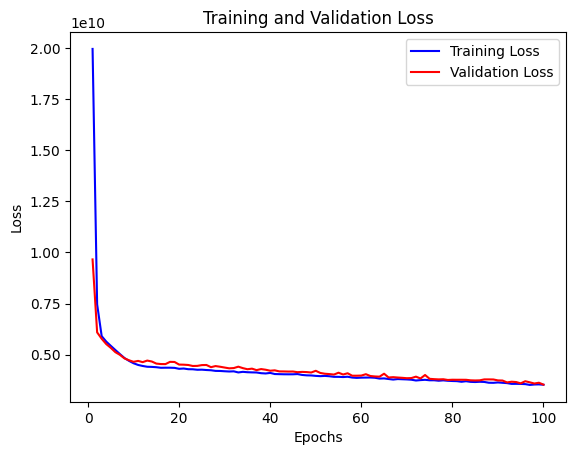

In [26]:
# Get the training and validation loss from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)
# Plot the training and validation loss
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')

# Label the plot
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

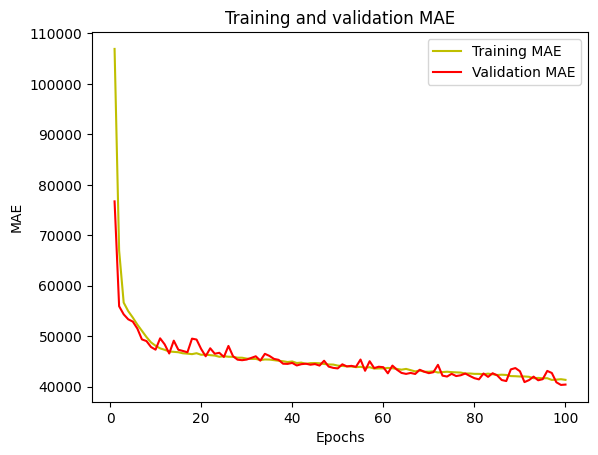

In [27]:
mae = history.history['mae']
val_mae = history.history['val_mae']
#Plot the Training and Validation MAE
plt.plot(epochs, mae, 'y', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


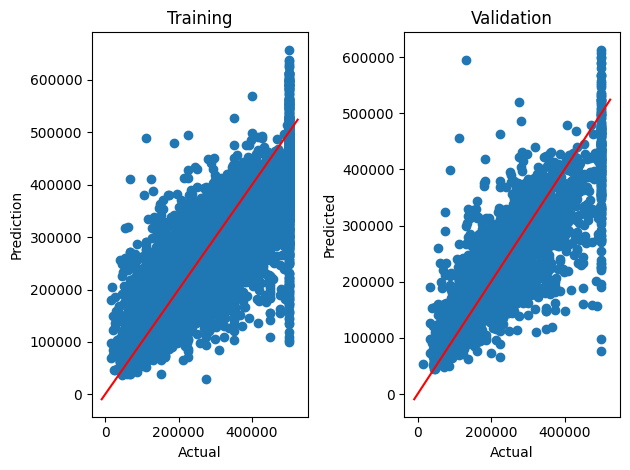

In [28]:
# Specify the dimensions 
fig, axes = plt.subplots(1,2)

# This makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(x_train))
axes[0].set_xlabel('Actual', fontsize=10)
axes[0].set_ylabel('Prediction', fontsize=10)
axes[0].set_title('Training')

# Add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

# Validation Results
axes[1].scatter(x=y_test, y=model.predict(x_test))
axes[1].set_xlabel('Actual', fontsize=10)
axes[1].set_ylabel('Predicted', fontsize=10)
axes[1].set_title('Validation')

# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# Tight layout
fig.tight_layout()
plt.show()


Model Evaluation

In [29]:
#Predict on test data
predictions = model.predict(x_test[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted values are:  [[ 63455.984]
 [443759.   ]
 [147592.58 ]
 [233747.23 ]
 [110230.65 ]]
Real values are:  [ 75500. 500001. 142600. 269100.  82700.]


In [30]:
model.save("model_ann_reg.h5")

import pickle
pickle.dump(min_max_scaler,open('scaler.pkl','wb'))